#### Name: Foyez Ahmed
#### Inter_ID: 	i23b0034s13

#### Installing Libraries

In [1]:
!pip install matplotlib
!pip install seaborn

#### Importing Libraries

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

#### Dataset Load

In [5]:
fact_table = pd.read_excel(r'e-com-sales-out.xlsx', sheet_name='Fact_table', engine='openpyxl')

item_dim = pd.read_excel(r'e-com-sales-out.xlsx', sheet_name='Item_dim', engine='openpyxl')
 
customer_dim = pd.read_excel(r'e-com-sales-out.xlsx', sheet_name='Customer_dim', engine='openpyxl')
 
time_dim = pd.read_excel(r'e-com-sales-out.xlsx', sheet_name='Time_dim', engine='openpyxl')
 
store_dim = pd.read_excel(r'e-com-sales-out.xlsx', sheet_name='Store_dim', engine='openpyxl')
 
print("Successfully Loaded the Dataset!")

Successfully Loaded the Dataset!


#### Practice Problem 5.1 
Find the district-wise total sales price joining fact table and respective dimension table and visualize it to a line chart.

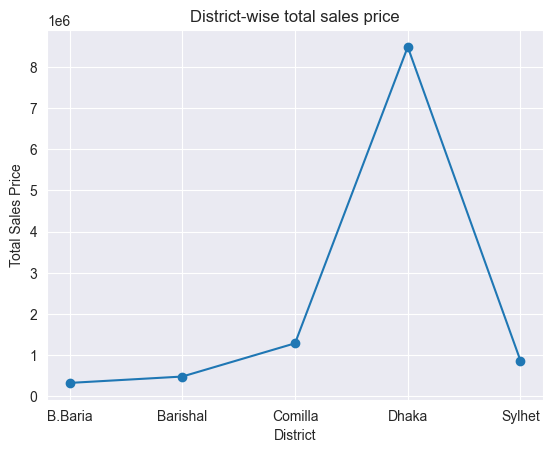

In [11]:
add_store_with_fact = pd.merge(fact_table, customer_dim, on='coustomer_key')

district_wise_total_sales = add_store_with_fact.groupby(['district']).aggregate({'total_price':'sum'}).reset_index()

sns.set_style("darkgrid")

plt.plot(district_wise_total_sales['district'], district_wise_total_sales['total_price'], marker='o')

plt.xlabel('District')
plt.ylabel('Total Sales Price')
plt.title("District-wise total sales price")

plt.show()


#### Practice Problem 5.2 
Find year-wise total sales in the Barishal and Sylhet division and plot those data into a linear chart.

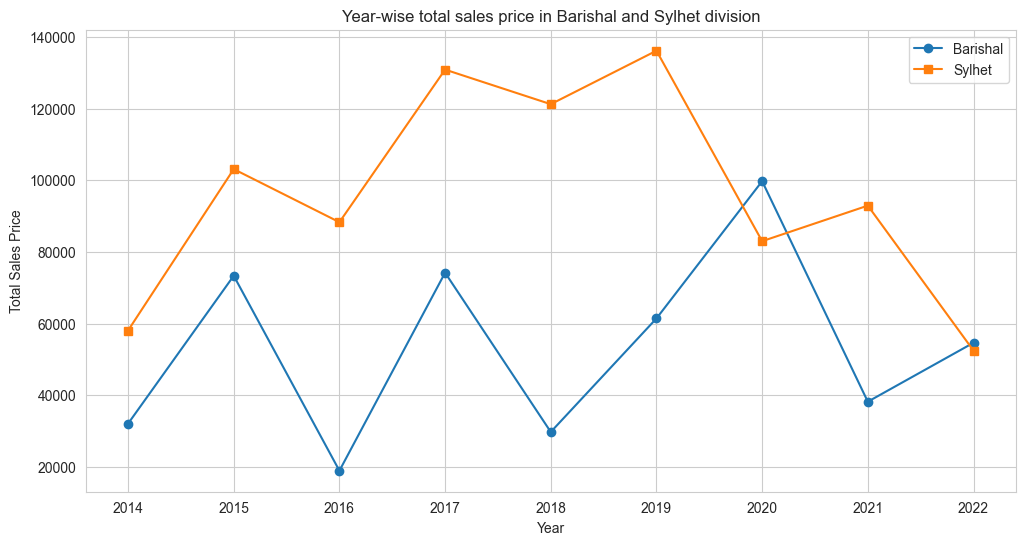

In [18]:
add_customer_time_with_fact = pd.merge(pd.merge(fact_table, time_dim, on='time_key'), customer_dim, on='coustomer_key')

dhaka_div = add_customer_time_with_fact.query("division == 'Barishal'")
dhaka_div_g = dhaka_div.groupby('year').aggregate({'total_price': 'sum'}).reset_index()

chittagong_div = add_customer_time_with_fact.query("division == 'Sylhet'")
chittagong_g = chittagong_div.groupby('year').aggregate({'total_price': 'sum'}).reset_index()

sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

plt.plot(dhaka_div_g['year'], dhaka_div_g['total_price'], marker='o', label='Barishal')

plt.plot(chittagong_g['year'], chittagong_g['total_price'], marker='s', label='Sylhet')

plt.xlabel('Year')
plt.ylabel('Total Sales Price')
plt.title("Year-wise total sales price in Barishal and Sylhet division")

plt.legend()
plt.show()

#### Practice Problem 5.3 
ind Dhaka's quarterly total sales price and plot it into a scatter chart.



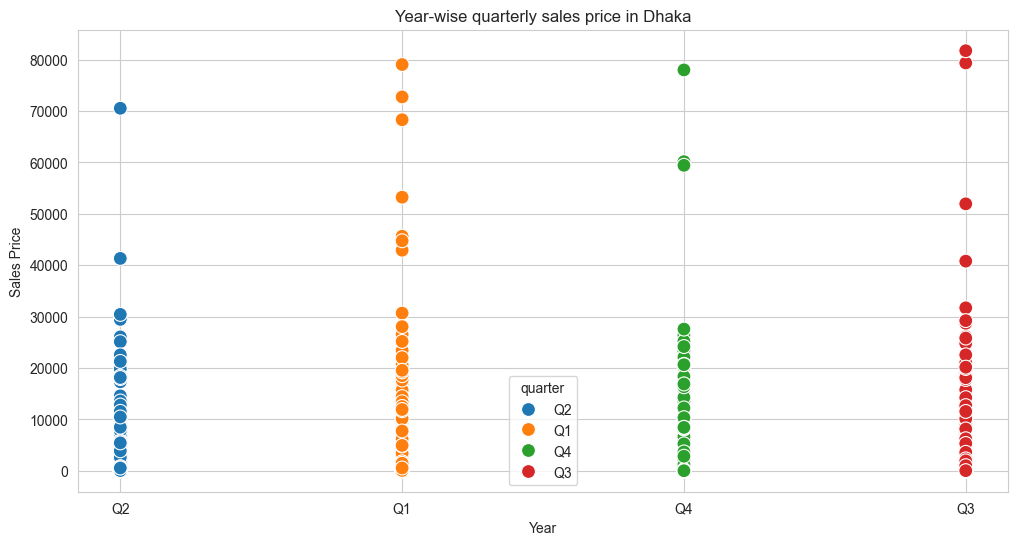

In [65]:
add_customer_time_with_fact = pd.merge(pd.merge(fact_table, time_dim, on='time_key'), customer_dim, on='coustomer_key')

quarter_wise_dhaka = add_customer_time_with_fact.query("division == 'Dhaka'")

quarter_wise_dhaka_x = quarter_wise_dhaka['quarter']
quarter_wise_dhaka_y = quarter_wise_dhaka['total_price']

plt.figure(figsize=(12, 6))

plt.title('Year-wise quarterly sales price in Dhaka')
plt.xlabel("Year")
plt.ylabel("Sales Price")

sns.scatterplot(
    x=quarter_wise_dhaka_x,
    y=quarter_wise_dhaka_y,
    hue=quarter_wise_dhaka['quarter'], 
    s=100
)

plt.show()


#### Practice Problem 5.4
What season(quarter) is the best for each product item? Show the data in a Barchart.

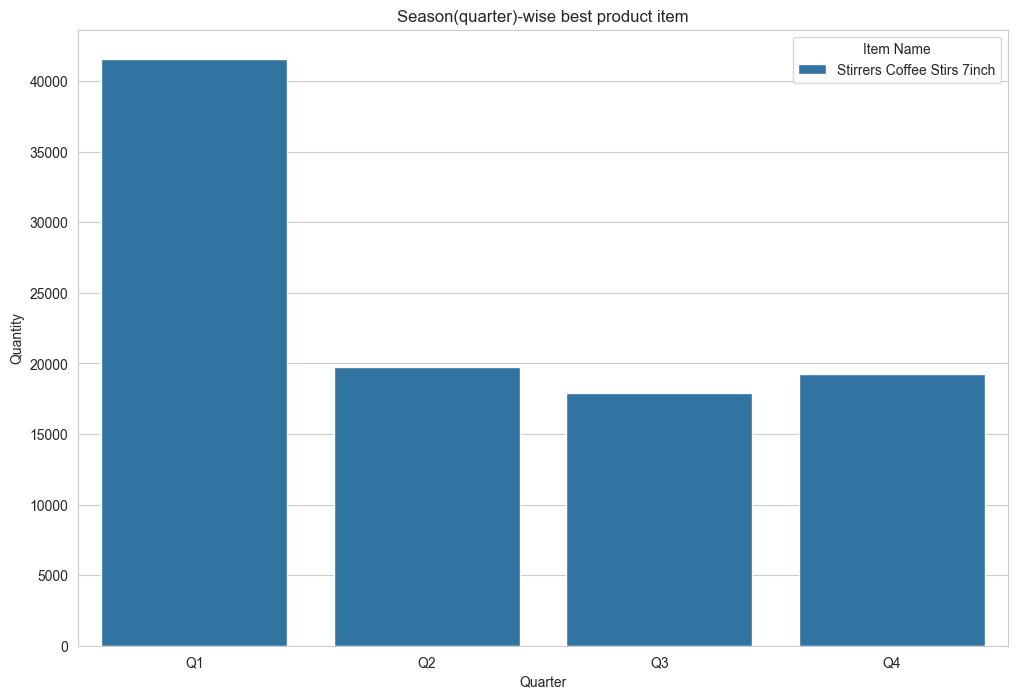

In [62]:
add_item_time_with_fact = pd.merge(pd.merge(fact_table, time_dim, on='time_key'), item_dim, on='item_key')

add_item_time_with_fact_g = add_item_time_with_fact.groupby(['item_name', 'quarter']).agg({'quantity': 'sum'}).reset_index()

best_item_quarter = add_item_time_with_fact_g.sort_values(['quarter', 'quantity'], ascending=[True, False]).groupby('quarter').head(1).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='quarter', y='quantity', hue='item_name', data=best_item_quarter)

plt.title('Season(quarter)-wise best product item')
plt.xlabel('Quarter')
plt.ylabel('Quantity')
plt.legend(title='Item Name', loc='upper right')

plt.show()


#### Practice Problem 5.5


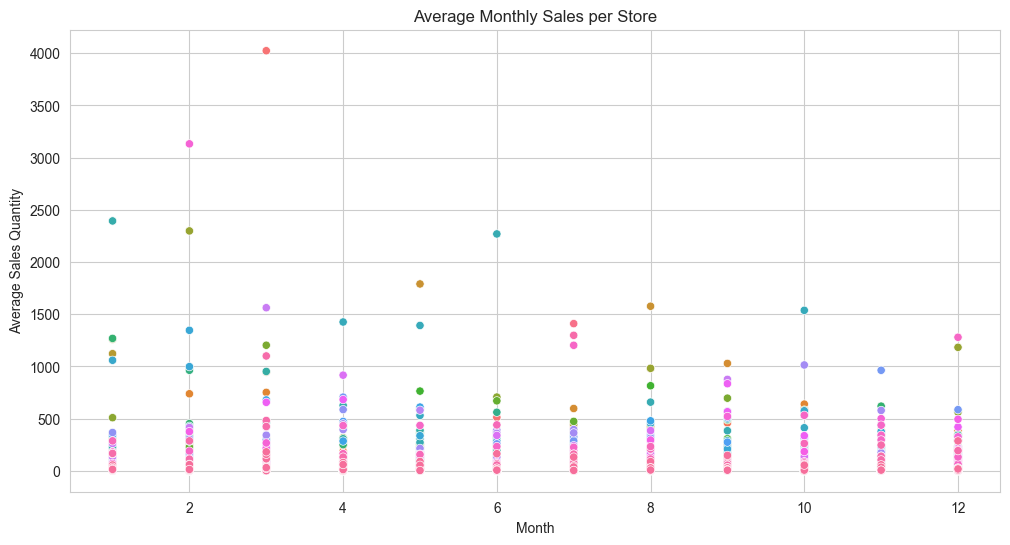

In [41]:
fact_table = pd.read_excel('e-com-sales-out.xlsx', sheet_name='Fact_table')
item_dim = pd.read_excel('e-com-sales-out.xlsx', sheet_name='Item_dim')
store_dim = pd.read_excel('e-com-sales-out.xlsx', sheet_name='Store_dim')
time_dim = pd.read_excel('e-com-sales-out.xlsx', sheet_name='Time_dim')

merged_data = pd.merge(fact_table, item_dim, on='item_key')
merged_data = pd.merge(merged_data, store_dim, on='store_key')
merged_data = pd.merge(merged_data, time_dim, on='time_key')

average_sales_per_store = merged_data.groupby(['store_key', 'year', 'month']).agg({'quantity': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
plt.title('Average Monthly Sales per Store')

sns.scatterplot(data=average_sales_per_store, x='month', y='quantity', hue='store_key', legend=False)

plt.xlabel('Month')
plt.ylabel('Average Sales Quantity')

plt.show()
